In [1]:
from _src.sys1d import KitaevChain
from _src.vqe import VQE
from matplotlib import pyplot

In [2]:
kc = KitaevChain("para.toml")
print(kc)

[KitaevChain]
# system size
  LSS = 8
# Boundary condition
  BDC = OBC
# parity
  PAR = 0
# Coupling constatnts
  CPC = {'t1': 1.0, 'D1': 0.3, 'V1': 0.1, 'mu': 0.05}



In [3]:
vqe = VQE("para.toml", kc.ham(), kc.ans(mly=2))
print(vqe)

[IniHAM]
  SysSiz = 8
  NTrm = 29

[IniANS]
  NQub = 8
  NLay = 2
  NLayGat = 29
  NIniGat = 0
  NFinGat = 0
  NPar = 58
  IniStt = 0b00000000

[IniVQE]
  MaxNIte = 10
  TicNIte = 100
  TolErr = 1e-06

[VQE]
# maximal # of minimize ite.
  MIT = 10
# tics # in each minimize ite.
  TIT = 100
# tolerence error
  TOL = 1e-06



In [4]:
vqe.ham.diag(omod=1,k=3,sbs=kc.sbs)

[EigEne]
  0 = -19.8237835018814
  1 = -16.369145473755264
  2 = -15.467755369895247



(array([-19.8237835 , -16.36914547, -15.46775537]),
 array([[ 1.68518484e-02+4.07105240e-03j, -2.82744095e-16+8.44664884e-17j,
          2.74030823e-02+2.07458904e-03j],
        [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j],
        [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j],
        [ 2.86149748e-02+6.91277649e-03j, -6.86470289e-03+2.75591806e-02j,
          1.94506031e-02+1.47253537e-03j],
        [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j],
        [ 5.24453350e-02+1.26696906e-02j, -5.91436523e-03+2.37439351e-02j,
          1.03153891e-02+7.80941096e-04j],
        [ 4.80237223e-02+1.16015220e-02j, -3.91184613e-04+1.57045797e-03j,
          1.25573736e-02+9.50673699e-04j],
        [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j],
    

In [5]:
vqe.bfgs()
print(vqe.ans)

[BFGS]
  [BFGS.In]
    Ene = -1.501044917175219
    Par = [7.967263398298157, 11.295902044912184, 9.5755986324895, 11.335425882671904, 1.7242261983069447, 3.702612531159455, 10.511559576375133, 12.116402007740716, 4.023154486027502, 1.489950766993558, 4.096132689219065, 3.963824612694389, 12.38284136037262, 9.84645597234935, 1.6206246999618978, 7.298955951992349, 3.8491157362036637, 1.8754733133014247, 3.9855637544932163, 10.90096621519401, 12.463390919852685, 7.747834393906406, 10.13054646230821, 1.255966391305958, 6.288250992683389, 9.576554420907904, 7.353904553896368, 2.424526876958014, 5.722026009245661, 9.029774160042397, 11.646202708543095, 10.060982940030328, 5.651485527490754, 8.389749067140901, 6.58630790362915, 0.9922232955909879, 12.147707216861635, 9.748860949235803, 6.204174636092361, 10.411093044299749, 9.479979566513773, 10.648092941318973, 2.0450556880910202, 8.83354867345268, 3.88424482626775, 6.883041381611874, 11.21587055310491, 9.307419628090626, 8.28567171528293, 

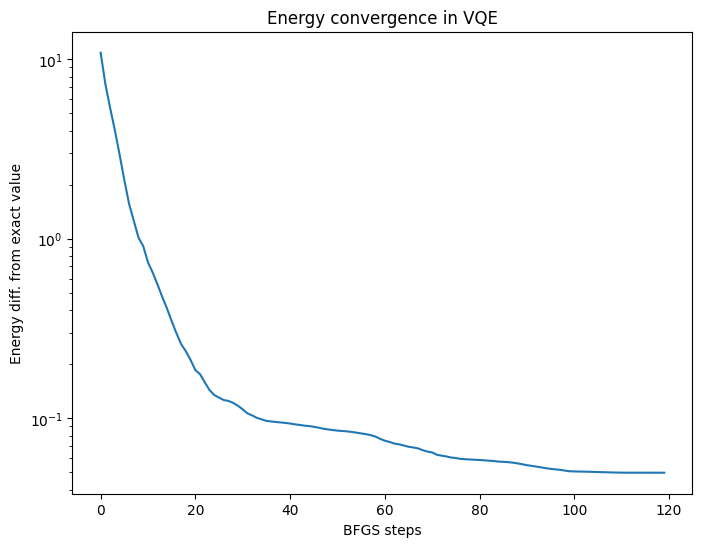

[-8.95324295998367, -12.554050712065138, -14.466543380892322, -15.799443628303122, -16.88366204187867, -17.702015771817962, -18.258323697840787, -18.56670545805836, -18.81131577070359, -18.915893094547442, -19.086855086272454, -19.176850910168078, -19.26803553234053, -19.349332999696337, -19.414547765371484, -19.47678240168478, -19.526352713897115, -19.565309370558953, -19.588188665014616, -19.613044845741562, -19.638509435480703, -19.64815764904446, -19.665667340375496, -19.680474945701697, -19.689383241915237, -19.69358523091486, -19.697688647998397, -19.699080505324623, -19.70223503185341, -19.70660278879285, -19.711876745318758, -19.717482203929645, -19.72025655058997, -19.723438285747356, -19.725337085941607, -19.727244352692846, -19.727923257349573, -19.72857709369505, -19.72914390758924, -19.7297152719299, -19.73043381723643, -19.73141373867886, -19.73210702038751, -19.732946648336405, -19.73344849302595, -19.734249684872022, -19.73528573239036, -19.736437989772256, -19.73724142

In [6]:
pyplot.figure(figsize=(8, 6))
ax = pyplot.gca()
ax.set_title('Energy convergence in VQE')
ax.set_xlabel('BFGS steps')
ax.set_ylabel('Energy diff. from exact value')

ax.semilogy(range(len(vqe.etb)), [n - vqe.ham.eig[0][0] for n in vqe.etb]) 
pyplot.show()

print(vqe.etb)